# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint
import os
#!pip install citipy
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#set style for plots
plt.style.use("seaborn")
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cityCount=len(cities)

#convert to dataframe
city_df=pd.DataFrame(cities)

#remove duplicate cities
new_city_df=city_df.drop_duplicates()
new_city_df

,0
0,saint-georges
1,mount gambier
2,vanimo
3,talnakh
4,atuona
...,...
631,karakendzha
632,vila praia de ancora
633,macara
634,khilok


In [13]:
#Extracting cities and creating new df

sample_cities = new_city_df.sample(600)
sample_cities = sample_cities.reset_index(drop = True)
sample_cities.columns = ["City"]
sample_cities.index += 1 
sample_cities["Lat"] = ""
sample_cities["Lng"] = ""
sample_cities["Country"] = ""
sample_cities["Date"] = ""
sample_cities["Max Temp"] = ""
sample_cities["Humidity"] = ""
sample_cities["Cloudiness"] = ""
sample_cities["Wind Speed"] = ""
sample_cities.head(10)

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,leningradskiy,,,,,,,,
2,mys shmidta,,,,,,,,
3,bathsheba,,,,,,,,
4,mandalgovi,,,,,,,,
5,port elizabeth,,,,,,,,
6,melfi,,,,,,,,
7,hami,,,,,,,,
8,codrington,,,,,,,,
9,forbes,,,,,,,,
10,dakar,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
units="Imperial"

print("Starting Data Scraping process")
print("-------------------------------")
# start counter
counter=0
index=0
for index,row in sample_cities.iterrows():
    city_name=sample_cities.iat[counter,0]  
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, api_key,city_name)
    
    try:
        city_weather = requests.get(target_url).json()
        sample_cities.iat[index,1]=city_weather.get("coord",{}).get("lat")
        sample_cities.iat[index,2]=city_weather.get("coord",{}).get("lon")
        sample_cities.iat[index,3]=city_weather.get("sys",{}).get("country")
        sample_cities.iat[index,4]=city_weather.get("dt",{})
        sample_cities.iat[index,5]=city_weather.get("main",{}).get("temp_max")
        sample_cities.iat[index,6]=city_weather.get("main",{}).get("humidity")
        sample_cities.iat[index,7]=city_weather.get("clouds",{}).get("all")
        sample_cities.iat[index,8]=city_weather.get("wind",{}).get("speed")

        print(f"Processing Record {counter} | {city_name}")
        print_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, "api_id", city_name)
        print(print_url)
    
    #increase counter by one 
        counter=counter+1
    #add time buffer to not over exceed rate limit of OpenWeather API
        time.sleep(1.01)
    
    # If no record found "skip" to next call
    except:
        print(f"Error: City not found while processing Record {counter} |{city_name}")
        sample_cities.iat[index,0].append(np.nan)
        sample_cities.iat[index,1].append(np.nan)
        sample_cities.iat[index,2].append(np.nan)
        sample_cities.iat[index,3].append(np.nan)
        sample_cities.iat[index,4].append(np.nan)
        sample_cities.iat[index,5].append(np.nan)
        sample_cities.iat[index,6].append(np.nan)
        sample_cities.iat[index,7].append(np.nan)
        sample_cities.iat[index,8].append(np.nan)
    continue
    
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
    

Starting Data Scraping process
-------------------------------
Processing Record 0 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=leningradskiy
Processing Record 1 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mys shmidta
Processing Record 2 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bathsheba
Processing Record 3 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mandalgovi
Processing Record 4 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=port elizabeth
Processing Record 5 | melfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=melfi
Processing Record 6 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hami
Processing Record 7 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 69 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kamenka
Processing Record 70 | bairiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bairiki
Processing Record 71 | macara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=macara
Processing Record 72 | krasnovishersk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=krasnovishersk
Processing Record 73 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sabha
Processing Record 74 | tapaua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tapaua
Processing Record 75 | wellington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=wellington
Processing Record 76 | manbij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=manbij
Processing Record 77 | itoman
http://api.openweathermap.org/da

Processing Record 139 | marseille
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=marseille
Processing Record 140 | boca do acre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=boca do acre
Processing Record 141 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=verkhoyansk
Processing Record 142 | a
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=a
Processing Record 143 | channel-port aux basques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=channel-port aux basques
Processing Record 144 | bandundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bandundu
Processing Record 145 | qorveh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=qorveh
Processing Record 146 | general pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=general pico
Processing

Processing Record 208 | ijaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ijaki
Processing Record 209 | canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=canutama
Processing Record 210 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=faanui
Processing Record 211 | road town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=road town
Processing Record 212 | unity
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=unity
Processing Record 213 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=prince rupert
Processing Record 214 | kimbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kimbe
Processing Record 215 | salitrillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=salitrillo
Processing Record 216 | aflu
http://api.openweathermap

Processing Record 278 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=roma
Processing Record 279 | dingzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dingzhou
Processing Record 280 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=alofi
Processing Record 281 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hithadhoo
Processing Record 282 | melsungen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=melsungen
Processing Record 283 | mangaluru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mangaluru
Processing Record 284 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=zhangjiakou
Processing Record 285 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=tuatapere
Processing Record 286 | campbell river
http://ap

Processing Record 346 | calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=calabozo
Processing Record 347 | ozernovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ozernovskiy
Processing Record 348 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=japura
Processing Record 349 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=isangel
Processing Record 350 | asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=asyut
Processing Record 351 | laurel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=laurel
Processing Record 352 | bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bara
Processing Record 353 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sisimiut
Processing Record 354 | vila franca do campo
http://api.openweathe

Processing Record 414 | nuevo imperial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nuevo imperial
Processing Record 415 | hammerfest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hammerfest
Processing Record 416 | porangatu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=porangatu
Processing Record 417 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=new norfolk
Processing Record 418 | mindelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mindelo
Processing Record 419 | mananara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mananara
Processing Record 420 | elizabeth city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=elizabeth city
Processing Record 421 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=longyearbyen
Proces

Processing Record 483 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=yenagoa
Processing Record 484 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nyurba
Processing Record 485 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=agadez
Processing Record 486 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=klaksvik
Processing Record 487 | senekal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=senekal
Processing Record 488 | dzilam gonzalez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dzilam gonzalez
Processing Record 489 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=inhambane
Processing Record 490 | biograd na moru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=biograd na moru
Processing Record 491 | lompoc

Processing Record 551 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=omboue
Processing Record 552 | lumeje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lumeje
Processing Record 553 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=iskateley
Processing Record 554 | veydelevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=veydelevka
Processing Record 555 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=constitucion
Processing Record 556 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hermanus
Processing Record 557 | praxedis guerrero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=praxedis guerrero
Processing Record 558 | kempsey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kempsey
Processing Record 559 | ka

IndexError: index 600 is out of bounds for axis 0 with size 600

In [5]:
#data cleansing and saving as csv
#remove missing values from dataframe
sample_cities=sample_cities.dropna()
#Save Csv file in Output folder
#sample_cities.to_csv('Output/weatherpy_data.csv')

sample_cities.count(axis=0)

City          563
Lat           563
Lng           563
Country       563
Date          563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
dtype: int64

In [7]:
sample_cities.head()

#remove first row
sample_cities=sample_cities.drop(sample_cities.index[0])
sample_cities = sample_cities.reset_index(drop=True)
sample_cities.head()

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,itapema,39.41,-74.36,US,1576017888,59,87,90,9.17
1,labuhan,-27.09,-48.61,BR,1576017809,77,83,40,6.93
2,beloha,-2.54,115.51,ID,1576017890,76.39,91,100,0.4
3,barrow,-25.17,45.06,MG,1576017892,73.51,81,100,15.12
4,asyut,-38.31,-60.23,AR,1576017893,57.54,72,33,6.87


In [8]:
sample_cities.count(axis=0)
#check datatypes
sample_cities.dtypes

#convert variables/objects to float
#sample_cities["Lat"] = sample_cities.Lat.astype(float)
#sample_cities["Lng"] = sample_cities.Lng.astype(float)
#sample_cities["Max Temp"] = sample_cities["Max Temp"].astype(float)
sample_cities["Humidity"] = sample_cities["Humidity"].astype(float)
sample_cities["Cloudiness"] = sample_cities["Cloudiness"].astype(float)
sample_cities["Wind Speed"] = sample_cities["Wind Speed"].astype(float)
sample_cities.dtypes

ValueError: could not convert string to float: 

In [142]:
sample_cities.info

<bound method DataFrame.info of              City    Lat     Lng Country        Date  Max Temp Humidity  \
0    saint george -31.95  115.86      AU  1573100879     81.00       34   
1        nyanguge  39.45   22.34      GR  1573100880     53.60       87   
2         mataura  -2.54   33.20      TZ  1573100881     66.20       93   
3      vila velha -46.19  168.86      NZ  1573100882     66.67       69   
4           wajid  -3.71  -38.60      BR  1573100832     79.00       78   
..            ...    ...     ...     ...         ...       ...      ...   
527     rotherham -41.87  -73.83      CL  1573101516     41.65       87   
528        mocuba  53.43   -1.36      GB  1573101517     44.60       93   
529    kaitangata -16.84   36.99      MZ  1573101518     89.22       43   
530   east london -46.28  169.85      NZ  1573101519     55.99       88   
531      chipinge -33.02   27.91      ZA  1573101520     64.40       77   

    Cloudiness Wind Speed  
0           16      10.29  
1          

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

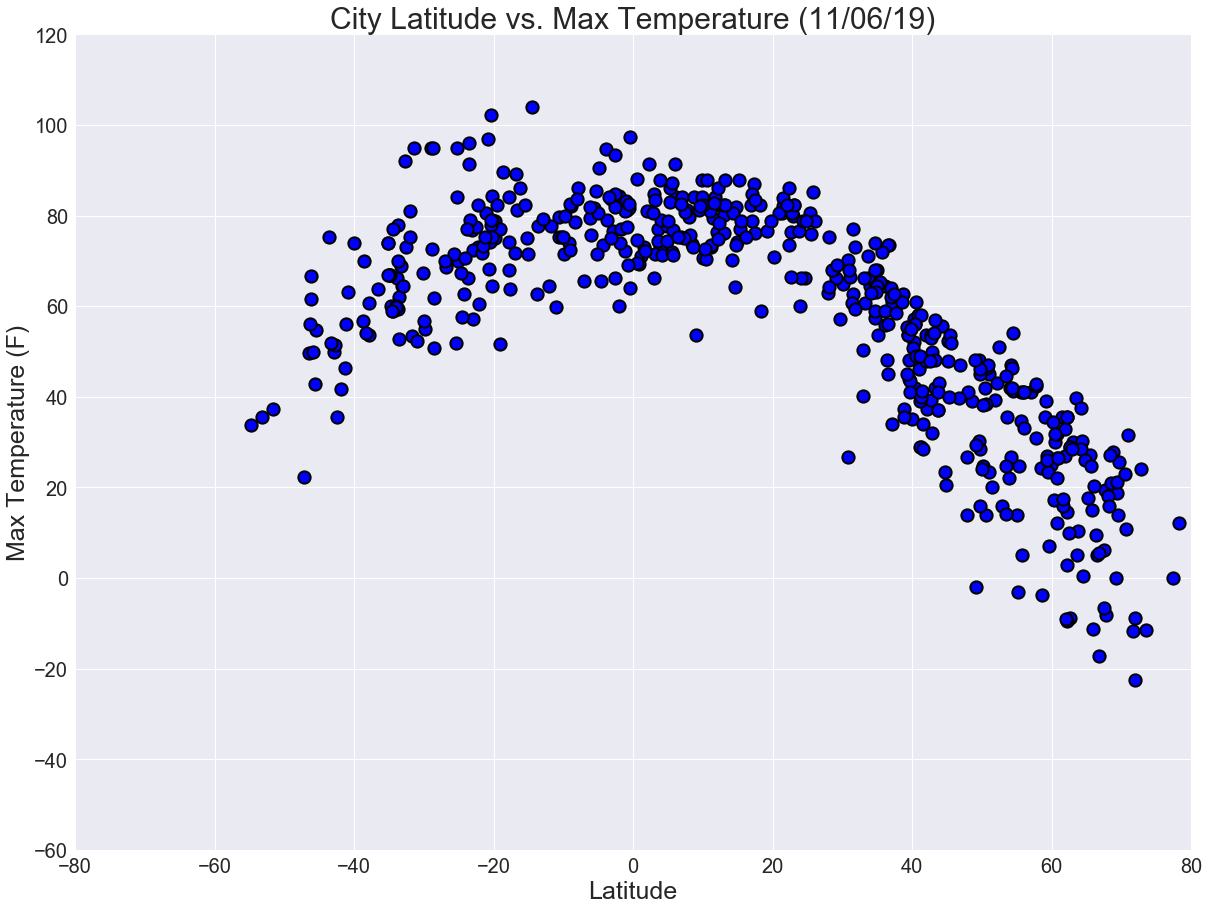

In [155]:
sample_cities.plot(kind="scatter", x="Lat", y="Max Temp",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20,15))
plt.title('City Latitude vs. Max Temperature (11/06/19)', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.savefig('Output/latitude_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

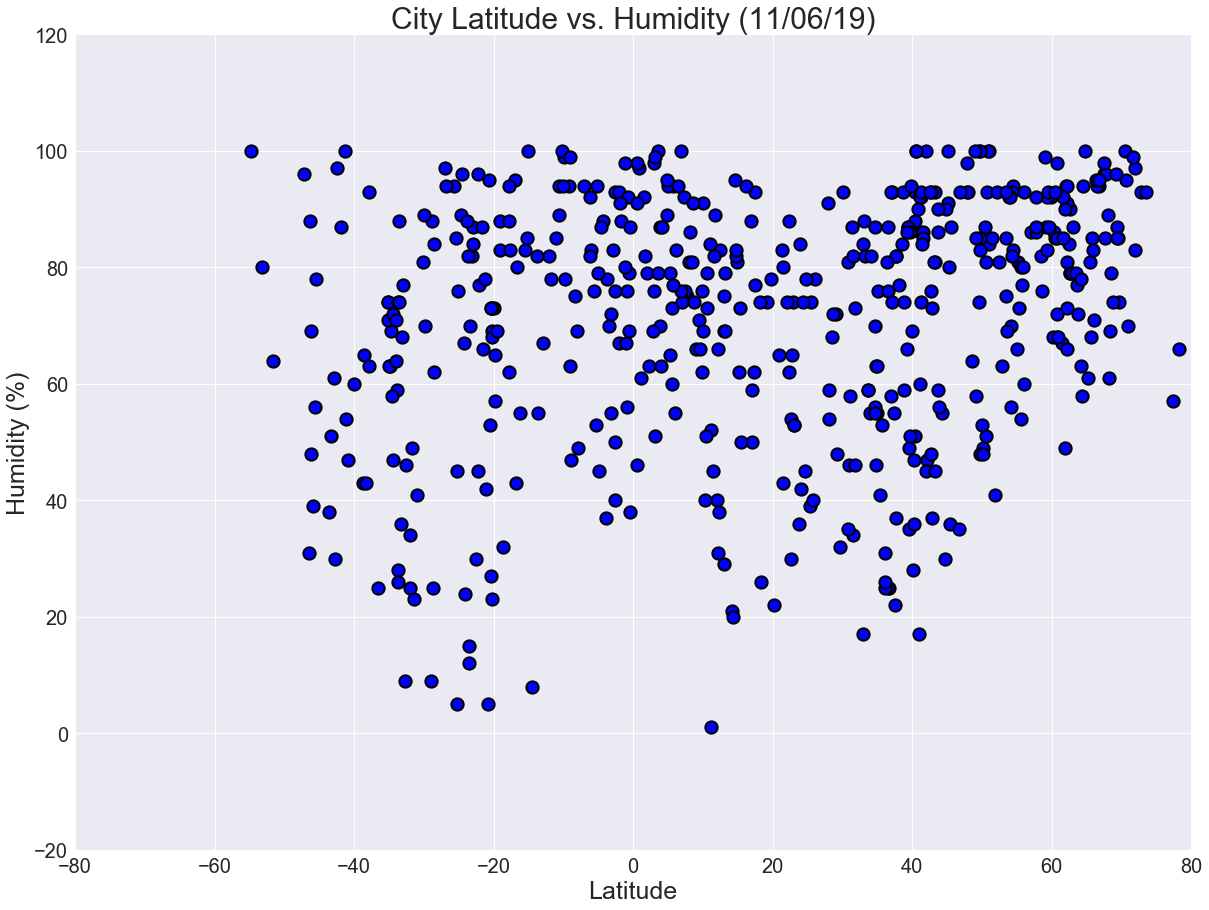

In [154]:
sample_cities.plot(kind="scatter",x="Lat",y="Humidity",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity (11/06/19)', fontsize = 30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
#plt.savefig('Output/latitude_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

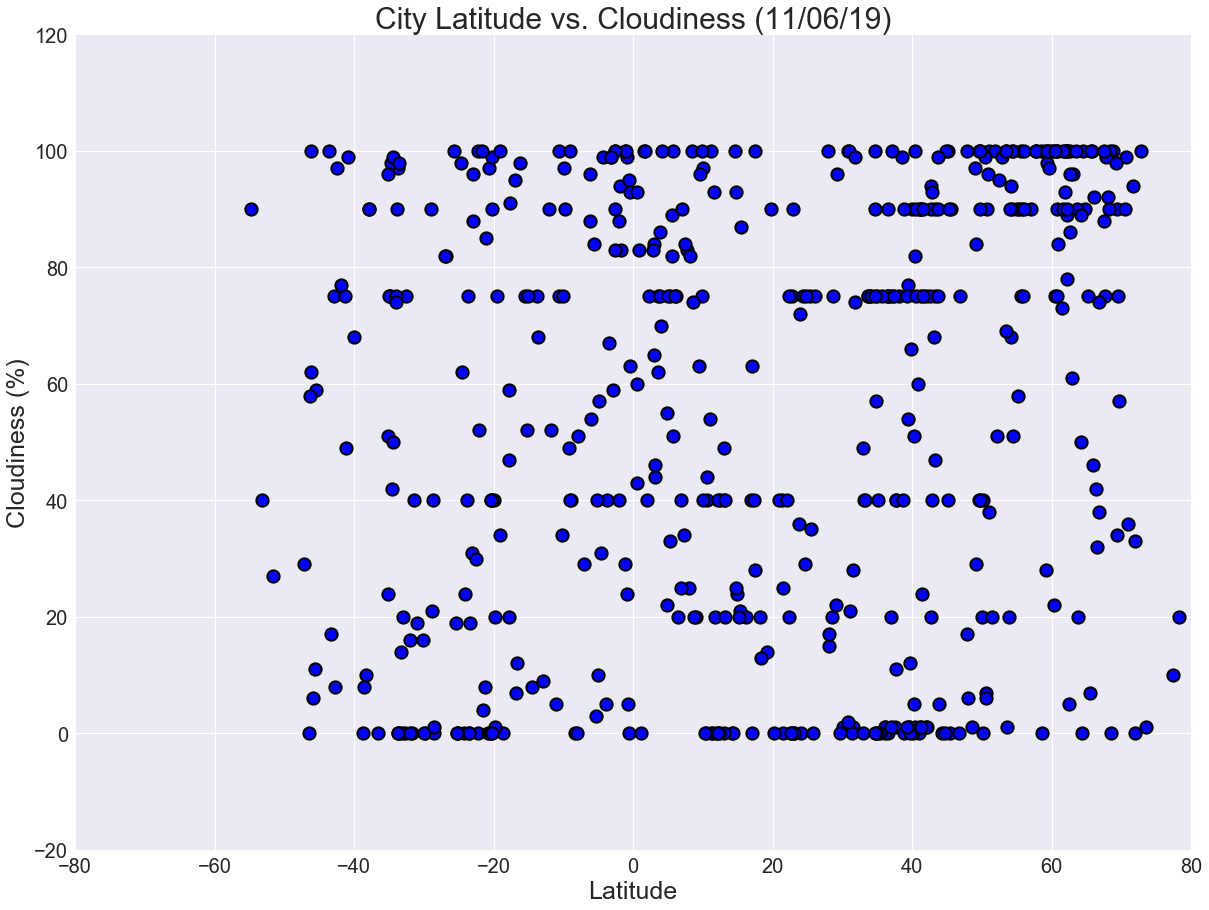

In [157]:
sample_cities.plot(kind="scatter",x="Lat",y="Cloudiness",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness (11/06/19)', fontsize = 30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
#plt.savefig('Output/latitude_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

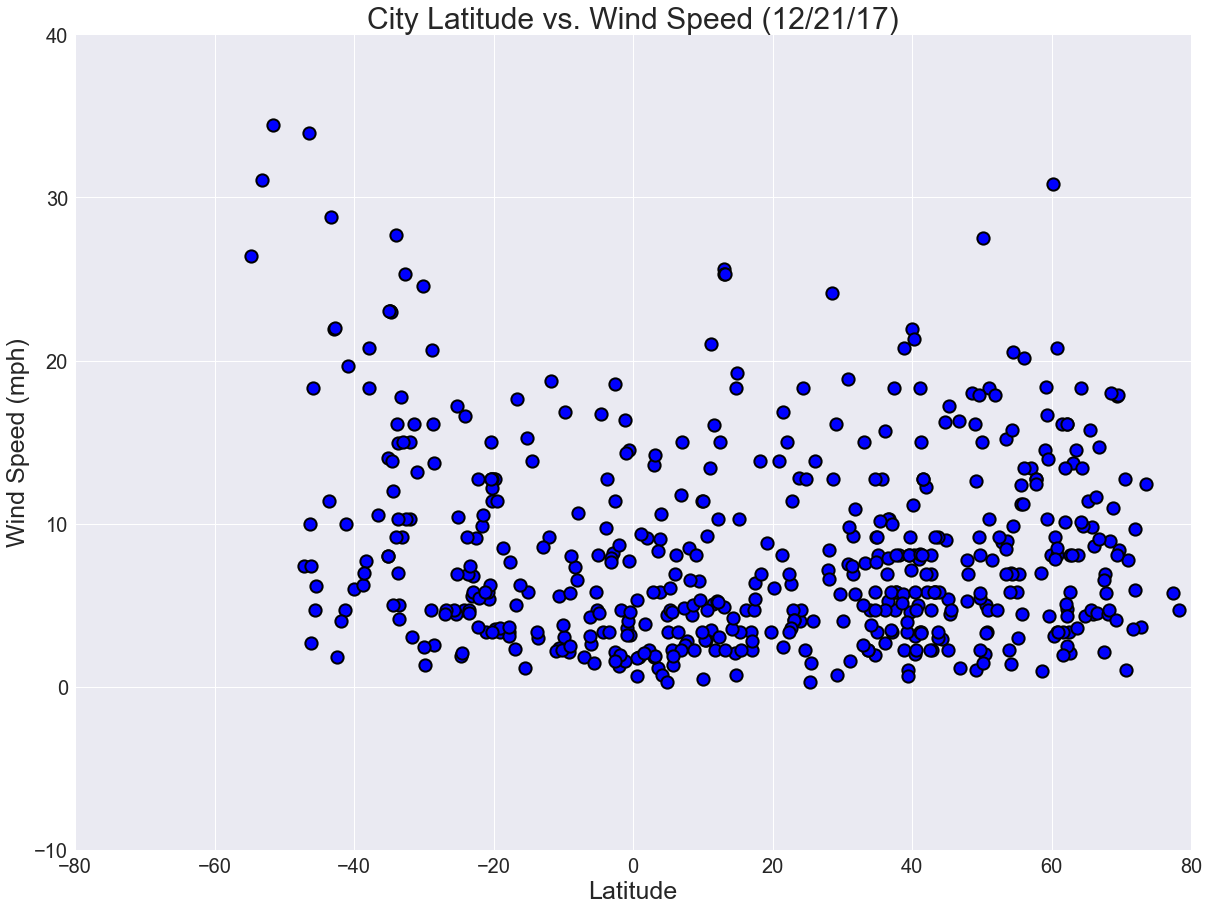

In [160]:
sample_cities.plot(kind="scatter",x="Lat",y="Wind Speed",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed (12/21/17)', fontsize = 30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-10, 40)
plt.tick_params(labelsize=20)
#plt.savefig('Output/latitude_windspeed.png')
plt.show()

# Observations
